<a href="https://colab.research.google.com/github/Haymisey/DevTech_Tasks/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn nltk matplotlib seaborn


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Preview the first few rows of the dataset
data.head()

# Assign column names to make the dataset more understandable
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Show the number of samples for each sentiment
data['target'].value_counts()


,count
target,
0,800000
4,800000


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(tokens)

print(data.columns)
print(data.head())

data['cleaned_text'] = data['text'].apply(preprocess_text)

data[['cleaned_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'cleaned_text'], dtype='object')
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  \
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1    scotthamilton  is upset that he can't update his Facebook by ...   
2         mattycus  @Kenichan I dived many times for the ball. Man...   
3          ElleCTF    my whole body feels itchy and like its on fire    
4           Karoli  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0      thats bummer should

,cleaned_text
0,thats bummer shoulda got david carr third day
1,upset cant update facebook texting might cry r...
2,dived many time ball managed save rest go bound
3,whole body feel itchy like fire
4,behaving im mad cant see


In [ ]:
# Step 1: Split the data into training and testing sets
X = data['cleaned_text']  # Features (tweets)
y = data['target']        # Target (sentiment: 0 for negative, 4 for positive)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 1280000
Test set size: 320000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Test data shape: {X_test_tfidf.shape}")


Training data shape: (1280000, 5000)
Test data shape: (320000, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.772578125
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           4       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



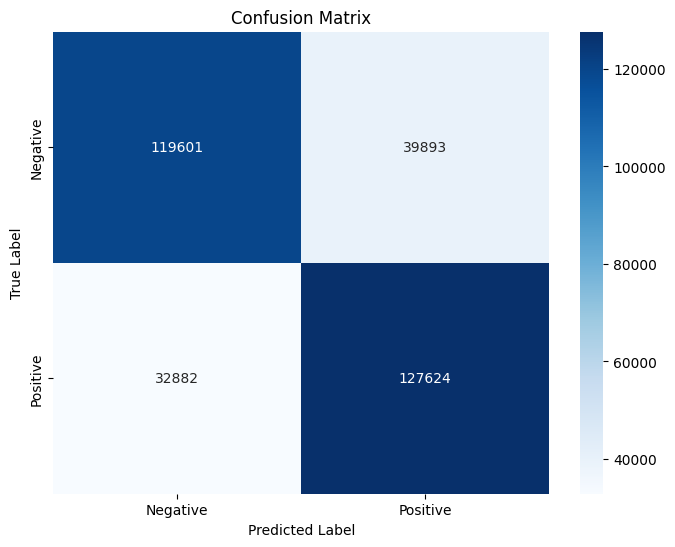

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
